In [1]:
import os
os.getcwd()

'D:\\sumin\\image_similartiy\\image_similartiy'

In [2]:
# horses/humans 데이터셋 경로 지정
photo_dir = './dataset/photo/photo_data/'

# horses 파일 이름 리스트
photo_names = os.listdir(photo_dir)
print(photo_names[:10])


# horses/humans 총 이미지 파일 개수
print('total photo images:', len(os.listdir(photo_dir)))


['덕수궁_CcagMLRvZOK.jpg', '덕수궁_CcaiGOfJYyN.jpg', '덕수궁_CcajL48pmbX.jpg', '덕수궁_CcaLxZal8DJ.jpg', '덕수궁_CcaMD8AL8eM.jpg', '덕수궁_CcaMVRiPqKb.jpg', '덕수궁_CcamWwFpMdb.jpg', '덕수궁_CcaOcBCPiEz.jpg', '덕수궁_CcaoZHZvrsi.jpg', '덕수궁_CcaQgNtBN2c.jpg']
total photo images: 749


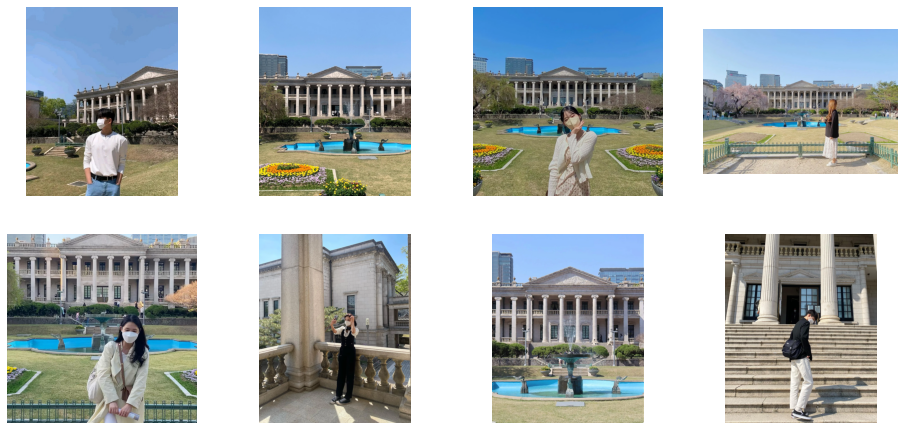

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_photo_pix = [os.path.join(photo_dir, fname) for fname in photo_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_photo_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [4]:
photo_dir = './dataset/photo/'
os.listdir(photo_dir)

['photo_data',
 '덕수궁_0001.jpg',
 '덕수궁_0002.jpg',
 '덕수궁_0003.jpg',
 '덕수궁_0004.jpg',
 '덕수궁_0005.jpg',
 '덕수궁_0006.jpg',
 '덕수궁_0007.jpg',
 '덕수궁_0008.jpg',
 '덕수궁_0009.jpg',
 '덕수궁_0010.jpg',
 '덕수궁_0011.jpg',
 '덕수궁_0012.jpg',
 '덕수궁_0013.jpg',
 '덕수궁_0014.jpg',
 '덕수궁_0015.jpg',
 '덕수궁_0016.jpg',
 '덕수궁_0017.jpg',
 '덕수궁_0018.jpg',
 '덕수궁_0019.jpg',
 '덕수궁_0020.jpg',
 '덕수궁_0021.jpg',
 '덕수궁_0022.jpg',
 '덕수궁_0023.jpg',
 '덕수궁_0024.jpg',
 '덕수궁_0025.jpg',
 '덕수궁_0026.jpg',
 '덕수궁_0027.jpg',
 '덕수궁_0028.jpg',
 '덕수궁_0029.jpg',
 '덕수궁_0030.jpg',
 '덕수궁_0031.jpg',
 '덕수궁_0032.jpg',
 '덕수궁_0033.jpg',
 '덕수궁_0034.jpg',
 '덕수궁_0035.jpg',
 '덕수궁_0036.jpg',
 '덕수궁_0037.jpg',
 '덕수궁_0038.jpg',
 '덕수궁_0039.jpg',
 '덕수궁_0040.jpg',
 '덕수궁_0041.jpg',
 '덕수궁_0042.jpg',
 '덕수궁_0043.jpg',
 '덕수궁_0044.jpg',
 '덕수궁_0045.jpg',
 '덕수궁_0046.jpg',
 '덕수궁_0047.jpg',
 '덕수궁_0048.jpg',
 '덕수궁_0049.jpg',
 '덕수궁_0050.jpg',
 '덕수궁_0051.jpg',
 '덕수궁_0052.jpg',
 '덕수궁_0053.jpg',
 '덕수궁_0054.jpg',
 '덕수궁_0055.jpg',
 '덕수궁_0056.jpg',
 '덕수궁_0057.jpg',
 '덕수궁_0058.jpg',

In [5]:
image_names=os.listdir(photo_dir)

In [6]:
img_path

'./dataset/photo/photo_data/덕수궁_CcaOcBCPiEz.jpg'

In [7]:
os.path.join(os.getcwd(),photo_dir)

'D:\\sumin\\image_similartiy\\image_similartiy\\./dataset/photo/'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(os.getcwd(),photo_dir),
    target_size=(299, 299),
    batch_size=32,
    subset='training')

Found 600 images belonging to 1 classes.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_generator = train_datagen.flow_from_directory(
  os.path.join(os.getcwd(),photo_dir),
  target_size=(299, 299),
  batch_size=32,
    subset='validation')

Found 149 images belonging to 1 classes.


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras.losses import MeanSquaredError
#keras.backend.clear_session()

In [14]:
# from keras.utils import np_utils
# from keras.models import Sequential, Model
# from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input, UpSampling2D
# from keras.callbacks import ModelCheckpoint, EarlyStopping

In [15]:
!nvidia-smi

Tue May 10 10:36:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 453.37       Driver Version: 453.37       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  TCC  | 00000000:00:05.0 Off |                  Off |
| N/A   31C    P0    38W / 300W |      1MiB / 32642MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
VGG16 = tf.keras.applications.VGG16(input_shape = (299, 299, 3), include_top = False, weights = 'imagenet') 
VGG16.trainable = False

In [17]:
VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [18]:
from tensorflow.keras.backend import clear_session
clear_session()
inputs = tf.keras.Input(shape=(299, 299, 3))
#x = data_augmentation(inputs)
#x = preprocess_input(inputs)
x = VGG16(inputs, training=False)
#x = global_average_layer(x)
#x = tf.reshape(x,(-1,64,2048))
#x = tf.keras.layers.Dense(256)(x)
encoder = tf.keras.layers.Flatten()(x)
latent= tf.keras.layers.Dense(300, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(62720,activation='relu')(latent)
model = tf.keras.Model(inputs, decoder)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='mse', metrics='mae')

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 300)               12441900  
                                                                 
 dense_1 (Dense)             (None, 62720)             18878720  
                                                                 
Total params: 46,035,308
Trainable params: 31,320,620
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1,
    callbacks=[es])

Epoch 1/100
19/19 [==============================] - 63s 3s/step - loss: 10.5044 - mae: 1.1793 - val_loss: 0.3605 - val_mae: 0.4283
Epoch 2/100
19/19 [==============================] - 52s 3s/step - loss: 0.3054 - mae: 0.3737 - val_loss: 0.2781 - val_mae: 0.3346
Epoch 3/100
19/19 [==============================] - 52s 3s/step - loss: 0.2852 - mae: 0.3597 - val_loss: 0.2871 - val_mae: 0.3859
Epoch 4/100
19/19 [==============================] - 53s 3s/step - loss: 0.2747 - mae: 0.3396 - val_loss: 0.2633 - val_mae: 0.2944
Epoch 5/100
19/19 [==============================] - 52s 3s/step - loss: 0.2649 - mae: 0.3051 - val_loss: 0.2608 - val_mae: 0.2914
Epoch 6/100
19/19 [==============================] - 53s 3s/step - loss: 0.2604 - mae: 0.2876 - val_loss: 0.2599 - val_mae: 0.2845
Epoch 7/100
19/19 [==============================] - 52s 3s/step - loss: 0.2590 - mae: 0.2759 - val_loss: 0.2590 - val_mae: 0.2759
Epoch 8/100
19/19 [==============================] - 52s 3s/step - loss: 0.2587 - 

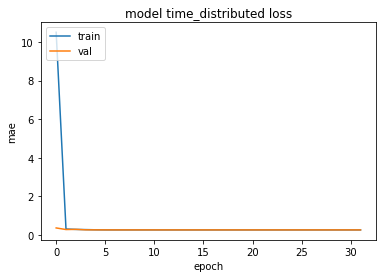

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model time_distributed loss')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
from keras.models import load_model

model.save('autoencoder_model.h5')
model = load_model('autoencoder_model.h5')

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 300)               12441900  
                                                                 
 dense_1 (Dense)             (None, 62720)             18878720  
                                                                 
Total params: 46,035,308
Trainable params: 31,320,620
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
import os 

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=model.input, outputs=model.get_layer('dense').output)

    def extract(self, img):
        # Resize the image
        img = img.resize((299, 299))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [25]:
paths=os.path.join(os.getcwd(),'dataset/background/')
photo_names=os.listdir(paths)
photo_names

['덕수궁_CcaiGOfJYyN.jpg',
 '덕수궁_CcamWwFpMdb.jpg',
 '덕수궁_Ccb45yRPkvd.jpg',
 '덕수궁_CcbmYTAP3-N.jpg',
 '덕수궁_Ccb_-EoPw--.jpg',
 '덕수궁_Ccc6ZnHLHqY.jpg',
 '덕수궁_CccGoIOL7A0.jpg',
 '덕수궁_CccIQuWPrJO.jpg',
 '덕수궁_CccR1MwBRau.jpg',
 '덕수궁_CccvBOxrfAH.jpg',
 '덕수궁_CcdCTc3PM-U.jpg',
 '덕수궁_CcdDNKQJkyX.jpg',
 '덕수궁_CceaP-MB_3B.jpg',
 '덕수궁_CceQwfgvKYC.jpg',
 '덕수궁_CceT0AXBGhW.jpg',
 '덕수궁_CceZIZdPOpK.jpg',
 '덕수궁_CcPticXvk9P.jpg',
 '덕수궁_CcVfboOpL6n.jpg',
 '덕수궁_CcX02xIL0oT.jpg',
 '덕수궁_CcX5T2uB3up.jpg',
 '덕수궁_CcZgAKnFFmN.jpg',
 '덕수궁_CcZiKPPr7cp.jpg',
 '덕수궁_CcZ_UfyB2Hg.jpg',
 '독립문_B1TJEHZBw1s.jpg',
 '독립문_Ca-KirBP9oE.jpg',
 '독립문_Ca1sIwSpvCH.jpg',
 '독립문_Ca1sOOmJh9M.jpg',
 '독립문_Ca2I5WxPIwO.jpg',
 '독립문_Ca3e6m_PRQu.jpg',
 '독립문_Ca3rzGcJK1Y.jpg',
 '독립문_Ca3WxL_PiJS.jpg',
 '독립문_Ca4FpatJ98g.jpg',
 '독립문_Ca4ZE3RvaMm.jpg',
 '독립문_Ca5ohypP638.jpg',
 '독립문_Ca9Bre9Jkp1.jpg',
 '독립문_Ca9xgvJvlOS.jpg',
 '독립문_CaCCYyqPvIV.jpg',
 '독립문_CagbCU-JltY.jpg',
 '독립문_Cah6dKsvttT.jpg',
 '독립문_CaiwTD_pDOn.jpg',
 '독립문_CaiZYqtBSFx.jpg',
 '독립문_Caj1rhNliu

In [26]:
img_paths_link = []
for i in range(len(photo_names)):
    if i%100 == 0:
        print(i)
    try:
        img_link = "https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/"+ photo_names[i]
        print(img_link)
        img_paths_link.append(img_link)
    except Exception as e:
        print('예외가 발생했습니다.', e)

0
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CcaiGOfJYyN.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CcamWwFpMdb.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_Ccb45yRPkvd.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CcbmYTAP3-N.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_Ccb_-EoPw--.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_Ccc6ZnHLHqY.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CccGoIOL7A0.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CccIQuWPrJO.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CccR1MwBRau.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/similarity/background/덕수궁_CccvBOxrfAH.jpg
https://photomarble.s3.ap-northeast-2.amazonaws.com/simila

In [27]:
import pandas as pd
pd.DataFrame(img_paths_link).to_csv("./background_paths.csv")

In [28]:
features = []
img_paths = []
from PIL import Image
import numpy as np
fe=FeatureExtractor()
# Save Image Feature Vector with Database Images
for i in range(len(photo_names)):
    if i%100 == 0:
        print(i)
    try:
        image_path = paths+ photo_names[i]
        print(image_path)
        img_paths.append(image_path)

    # Extract Features
        feature = fe.extract(img=Image.open(image_path))

        features.append(feature)

    # Save the Numpy array (.npy) on designated path
        feature_path = "./features_v3/" + photo_names[i][:-4]+ ".npy"
        np.save(feature_path, feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)

0
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CcaiGOfJYyN.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CcamWwFpMdb.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_Ccb45yRPkvd.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CcbmYTAP3-N.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_Ccb_-EoPw--.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_Ccc6ZnHLHqY.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CccGoIOL7A0.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CccIQuWPrJO.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CccR1MwBRau.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CccvBOxrfAH.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CcdCTc3PM-U.jpg
D:\sumin\image_similartiy\image_similartiy\dataset/background/덕수궁_CcdDNKQJkyX.jpg
D:\sumin\image

In [29]:
feature_path = "./features_v3/similar_background_feature.npy"
np.save(feature_path, features)

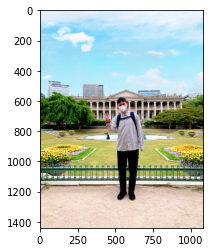

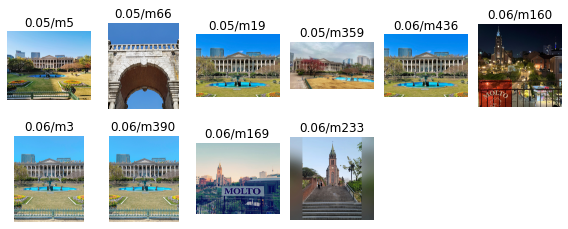

In [30]:
# Insert the image query
import matplotlib.pyplot as plt
img = Image.open("./test_dataset/성현.jpg")
plt.imshow(img)
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)

scores = [(dists[id], img_paths[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(0, len(scores[:10])):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()